<a href="https://colab.research.google.com/github/Sau-bio-info/Python/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [245]:
churn_data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [246]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [247]:
churn_data.shape

(7043, 21)

In [248]:
# Eliminating the column customer_ID as it is of no use

churn_data.drop(columns='customerID', axis=1,inplace=True)

In [249]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [250]:
churn_data.info()

churn_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

From info we got to know that Total charges object data type is object which should ideally be float or int. So we will check what is the issue.

In [251]:

pd.to_numeric(churn_data.TotalCharges, errors="coerce").isnull()



0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [252]:
churn_data[
pd.to_numeric(churn_data.TotalCharges, errors="coerce").isnull()

]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [253]:
new_churn=churn_data[churn_data.TotalCharges!=' ']

In [254]:
new_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [255]:
new_churn.TotalCharges=pd.to_numeric(new_churn.TotalCharges)

<ipython-input-255-421491e7aab5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_churn.TotalCharges=pd.to_numeric(new_churn.TotalCharges)


In [256]:
tenure_churn_no=new_churn[new_churn.Churn=="No"].tenure

tenure_churn_yes=new_churn[new_churn.Churn=="Yes"].tenure

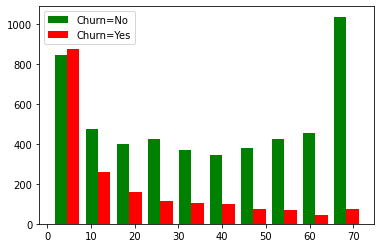

In [257]:
plt.hist([tenure_churn_no,tenure_churn_yes], color=["green","red"],label=["Churn=No","Churn=Yes"])

plt.legend()

In [258]:
MonthCharges_churn_no=new_churn[new_churn.Churn=="No"].MonthlyCharges

MonthCharges_churn_yes=new_churn[new_churn.Churn=="Yes"].MonthlyCharges

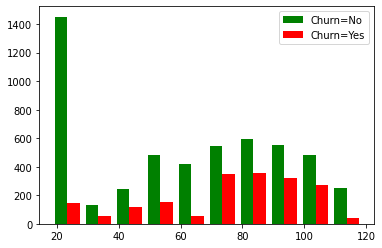

In [259]:
plt.hist([MonthCharges_churn_no,MonthCharges_churn_yes], color=["green","red"],label=["Churn=No","Churn=Yes"])

plt.legend()

In [260]:
for col in new_churn:
  if new_churn[col].dtype == "object":

    print(f"The column is {col} and unique values are {new_churn[col].unique()}")

The column is gender and unique values are ['Female' 'Male']
The column is Partner and unique values are ['Yes' 'No']
The column is Dependents and unique values are ['No' 'Yes']
The column is PhoneService and unique values are ['No' 'Yes']
The column is MultipleLines and unique values are ['No phone service' 'No' 'Yes']
The column is InternetService and unique values are ['DSL' 'Fiber optic' 'No']
The column is OnlineSecurity and unique values are ['No' 'Yes' 'No internet service']
The column is OnlineBackup and unique values are ['Yes' 'No' 'No internet service']
The column is DeviceProtection and unique values are ['No' 'Yes' 'No internet service']
The column is TechSupport and unique values are ['No' 'Yes' 'No internet service']
The column is StreamingTV and unique values are ['No' 'Yes' 'No internet service']
The column is StreamingMovies and unique values are ['No' 'Yes' 'No internet service']
The column is Contract and unique values are ['Month-to-month' 'One year' 'Two year']
Th

In [261]:
new_churn.replace("No internet service", "No", inplace=True)
new_churn.replace("No phone service", "No", inplace=True)

<ipython-input-261-00fa42b942a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_churn.replace("No internet service", "No", inplace=True)
<ipython-input-261-00fa42b942a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_churn.replace("No phone service", "No", inplace=True)


In [262]:
yes_no_col=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",
            "StreamingMovies","PaperlessBilling","Churn"]

for val in yes_no_col:
  new_churn.replace({"Yes": 1, "No": 0} , inplace=True)


new_churn.replace({"Female":1,"Male":0}, inplace=True)

<ipython-input-262-64a0feb6d910>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_churn.replace({"Yes": 1, "No": 0} , inplace=True)
<ipython-input-262-64a0feb6d910>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_churn.replace({"Female":1,"Male":0}, inplace=True)


In [263]:
new_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [264]:
final_churn=pd.get_dummies(data=new_churn, columns=["InternetService", "Contract","PaymentMethod"])

In [265]:
final_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [266]:
final_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [267]:
cols_to_scale=["tenure", "MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

final_churn[cols_to_scale]=scaler.fit_transform(final_churn[cols_to_scale])

In [268]:
final_churn.TotalCharges

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

Train test split

In [269]:
x= final_churn.drop('Churn', axis=1)

y=final_churn['Churn']

In [270]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [271]:
x_train.shape

#y_train.shape


(5625, 26)

In [272]:
import tensorflow as tf
from tensorflow import keras

In [273]:
model= keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,y_train, epochs=25)

Epoch 1/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4932 - accuracy: 0.7584
Epoch 2/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.7911
Epoch 3/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.7941
Epoch 4/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.7980
Epoch 5/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8028
Epoch 6/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.7998
Epoch 7/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8016
Epoch 8/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8044
Epoch 9/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8036
Epoch 10/25
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8050

In [286]:
prediction=model.predict(x_train)



prediction_value=[]


for every in prediction:
  if every > 0.5:
    prediction_value.append(1)

  else:
    prediction_value.append(0)

176/176 [==============================] - 0s 1ms/step


In [288]:
print(prediction_value[112], y_train.iloc[112])



0 0


In [289]:
prediction_test=model.predict(x_test)

prediction_test

prediction_test_list=[]

for nevery in prediction_test:

  if nevery > 0.5:
    prediction_test_list.append(1)
  else:
    prediction_test_list.append(0)





44/44 [==============================] - 0s 2ms/step


In [290]:
print(prediction_test_list[332] , y_test.iloc[332])



1 1
